## DS 6040 Final Project

### Exploratory Data Analysis

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('creditcard_2023(1).csv', index_col = 0)

In [2]:
data.head(3).T

id,0,1,2
V1,-0.260648,0.985100,-0.260272
V2,-0.469648,-0.356045,-0.949385
V3,2.496266,0.558056,1.728538
V4,-0.083724,-0.429654,-0.457986
V5,0.129681,0.277140,0.074062
V6,0.732898,0.428605,1.419481
V7,0.519014,0.406466,0.743511
V8,-0.130006,-0.133118,-0.095576
V9,0.727159,0.347452,-0.261297
V10,0.637735,0.529808,0.690708


There are 29 predictors, with class being the response variable. The only known predictor is amount and everything else is anonymized features, but they represent different features about the transactions (like location, time, etc.).

In [3]:
data.iloc[:, 0:-1].describe().apply(lambda x: round(x,2))

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,...,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00
mean,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,...,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,12041.96
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,6919.64
min,-3.50,-49.97,-3.18,-4.95,-9.95,-21.11,-4.35,-10.76,-3.75,-3.16,...,-78.15,-19.38,-7.73,-30.30,-4.07,-13.61,-8.23,-10.50,-39.04,50.01
25%,-0.57,-0.49,-0.65,-0.66,-0.29,-0.45,-0.28,-0.19,-0.57,-0.59,...,-0.35,-0.17,-0.49,-0.24,-0.65,-0.55,-0.63,-0.30,-0.23,6054.89
50%,-0.09,-0.14,0.00,-0.07,0.08,0.08,0.23,-0.11,0.09,0.26,...,-0.12,-0.04,-0.03,-0.06,0.02,-0.01,-0.01,-0.17,-0.01,12030.15
75%,0.83,0.34,0.63,0.71,0.44,0.50,0.53,0.05,0.56,0.59,...,0.25,0.15,0.46,0.16,0.70,0.55,0.67,0.33,0.41,18036.33
max,2.23,4.36,14.13,3.20,42.72,26.17,217.87,5.96,20.27,31.72,...,29.87,8.09,12.63,31.71,12.97,14.62,5.62,113.23,77.26,24039.93


Based on the summary statistics, it seems like each feature has already been standardized through a z-transformation, with the exception being price. 

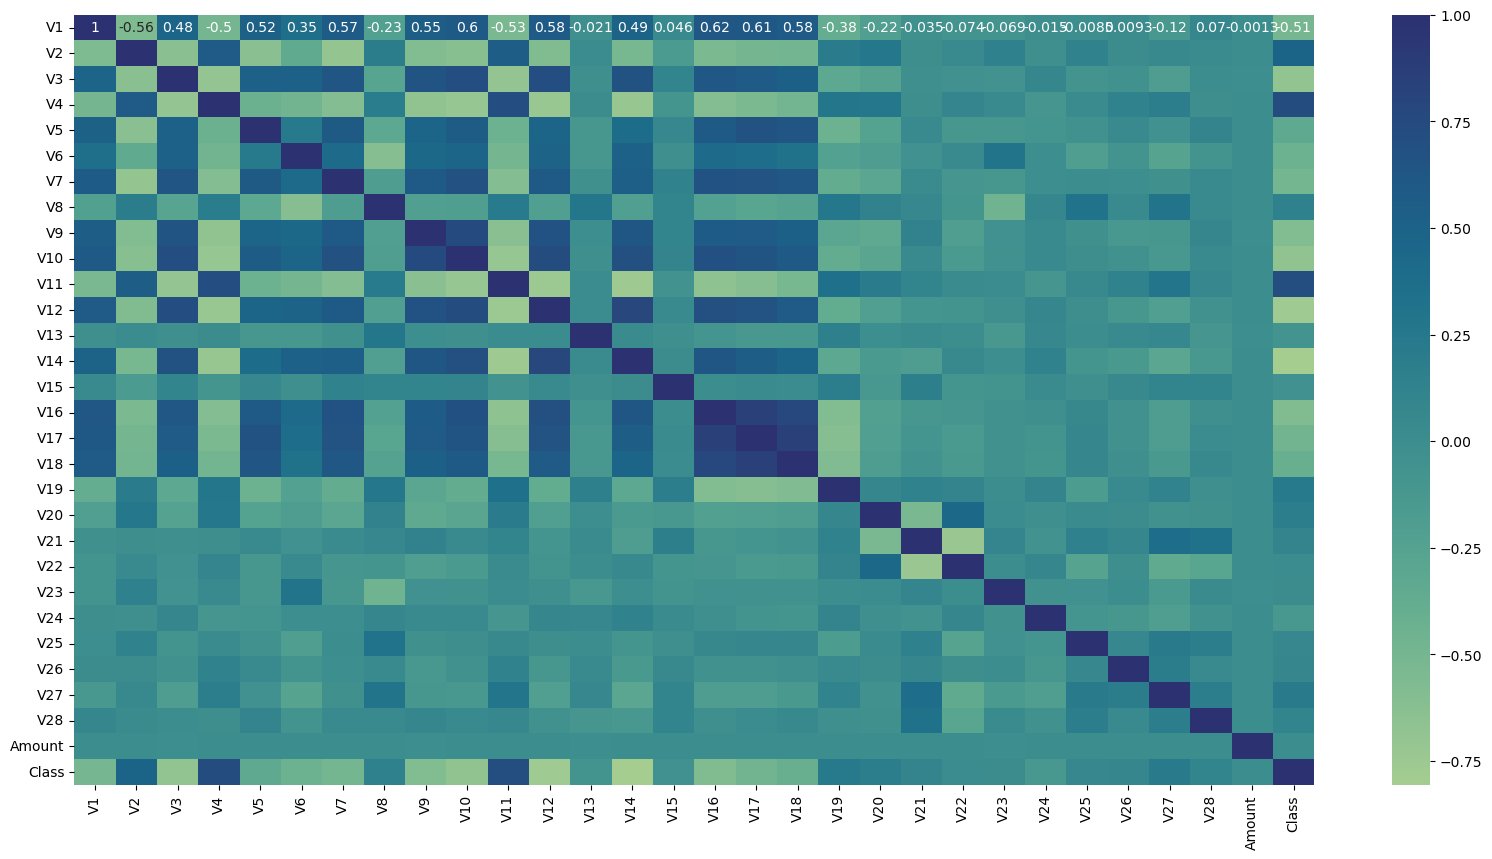

In [4]:
corr_matrix = data.corr()
plt.figure(figsize=[20,10])
sns.heatmap(corr_matrix, cmap='crest', annot=True)
plt.show()

In [5]:
high_corr_var = [(m, n) for m in corr_matrix.columns for n in corr_matrix.columns if (m != n) and abs(corr_matrix[m][n]) > 0.8]
print(high_corr_var)

[('V14', 'Class'), ('V16', 'V17'), ('V17', 'V16'), ('V17', 'V18'), ('V18', 'V17'), ('Class', 'V14')]


Seems like we have quite a high number of variables that are correlated with one another, which could a problem in our model. Let's first remove  V16 and V18

In [6]:
data = data.drop(columns=['V16', 'V18'])

Then let's try to do Random Forest and see what the feature importance is.

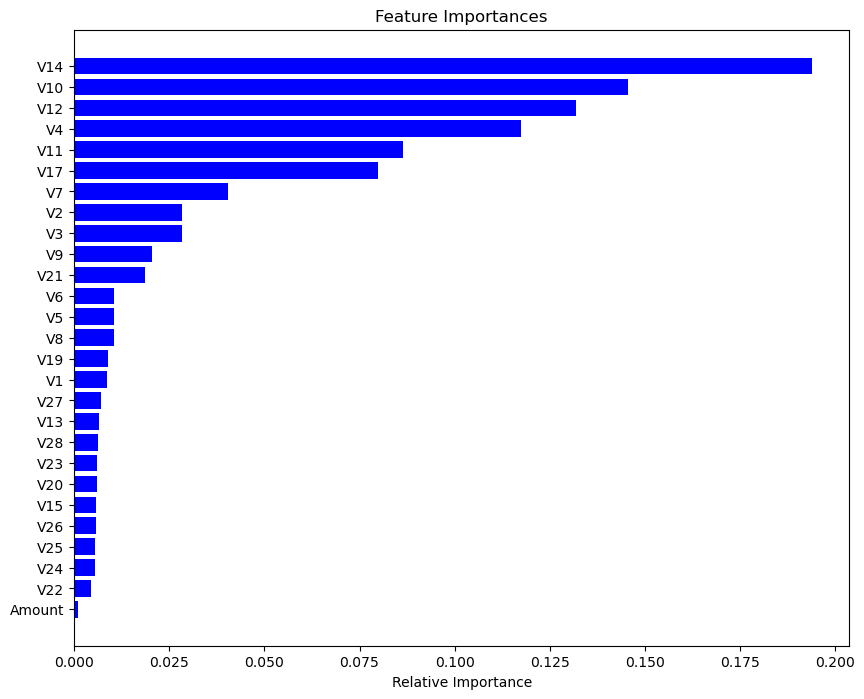

In [7]:
sampled_data = data.sample(n=30000)
X = sampled_data.drop('Class', axis=1) 
y = sampled_data['Class']

rf = RandomForestClassifier(max_depth=50, 
                            n_jobs=-1)
rf.fit(X, y)

importances = rf.feature_importances_

features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Let's remove  V13, V20, V26, V15, V28, V25, V23, V24, V22, V27

In [8]:
data = data.drop(columns=[ 'V13', 'V20', 'V26', 'V15', 'V28', 'V25', 'V23', 'V24', 'V22', 'V27'])

### Modeling

In [9]:
import pymc as pm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import arviz as az
import pytensor
import pytensor.tensor as pt
import scipy as sp
import scipy.stats as st
import bambi as bmb

random_seed =  730612
np.random.seed(random_seed)
az.style.use('arviz-darkgrid')

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [11]:
#scaler = StandardScaler()
#data[['V1', 'V2', 'V3', ..., 'V28', 'Amount']] = scaler.fit_transform(data[['V1', 'V2', 'V3', ..., 'V28', 'Amount']])

X = data.drop('Class', axis=1)
y = data['Class']


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

#### Naive Bayes Model

In [14]:
with pm.Model() as naive_bayes_model:
    X = pm.MutableData("X", X_train)
    y = pm.MutableData("y", y_train)
    class_prob = pm.Dirichlet('class_prob', a=np.array([1., 1.]))
    
    feature_means = pm.Normal('feature_means', mu=0, sigma=10, shape=(2, 17)) 
    feature_stds = pm.HalfNormal('feature_stds', sigma=10, shape=(2, 17))

    likelihood = pm.Normal('likelihood', mu=feature_means[y], 
                           sigma =feature_stds[y], observed=X)


    y_pred = pm.Categorical('y_pred', p=class_prob, observed=y)
    
g1 = pm.model_to_graphviz(naive_bayes_model)
g1.render("naive_bayes", format="png", cleanup=True)

'naive_bayes.png'

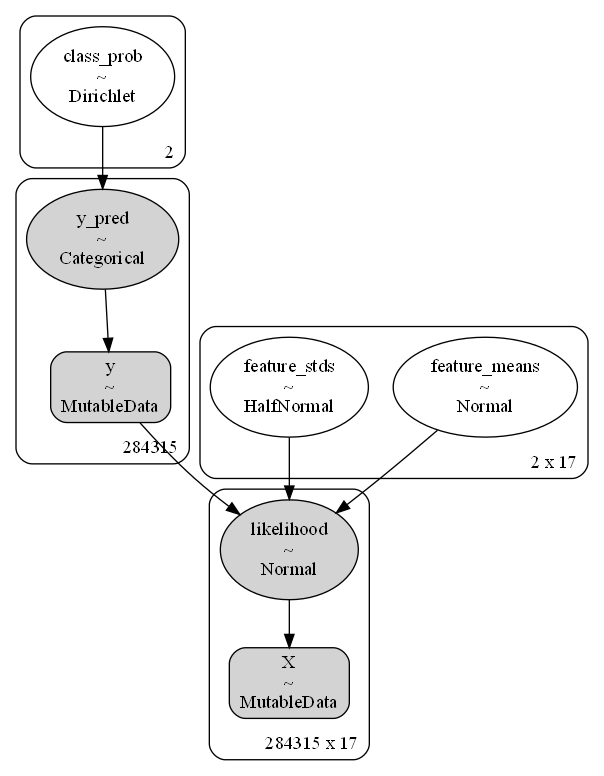

* **Using Variational Inference** (Faster and Scales better)

In [15]:
with naive_bayes_model:
    fit = pm.fit(30000, method='advi', random_seed = random_seed) 
    
approx_trace = fit.sample(draws=5000)

Finished [100%]: Average Loss = 9.0597e+06


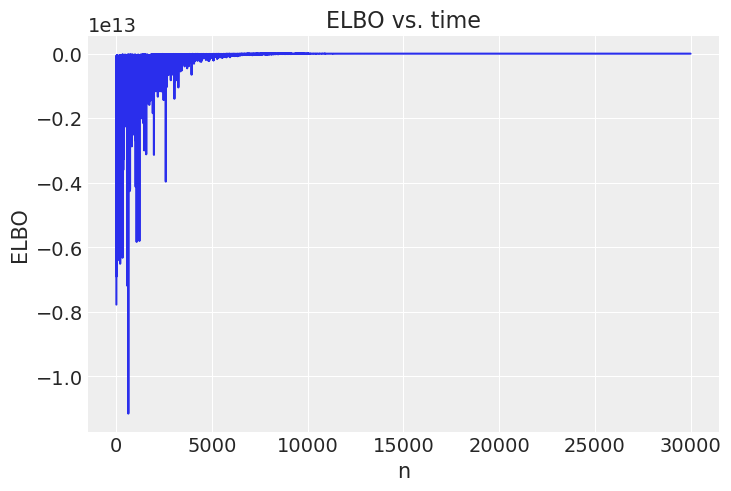

In [16]:
advi_elbo = pd.DataFrame(
    {'ELBO': -fit.hist,
     'n': np.arange(fit.hist.shape[0])})

plt.figure(dpi=100)
ax = sns.lineplot(y='ELBO', x='n', data=advi_elbo)
ax.set_title("ELBO vs. time")
plt.show()

* **Prediction**

In [18]:
X_test_subset = X_test.iloc[:1000, :]
y_test_subset = y_test.iloc[:1000]

In [27]:
with naive_bayes_model:
    pm.set_data({"X": X_test_subset, "y": y_test_subset})
    ppc = pm.sample_posterior_predictive(approx_trace, return_inferencedata=True, predictions=True, extend_inferencedata=True, random_seed = random_seed)

Sampling: [likelihood, y_pred]


AUC

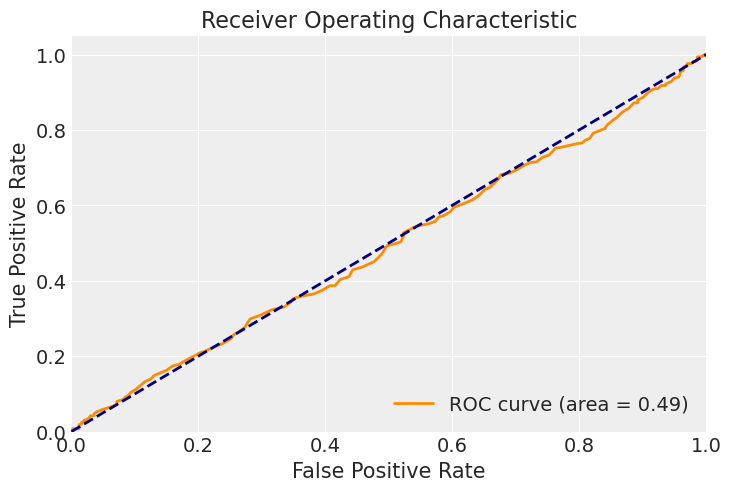

In [51]:
from sklearn.metrics import roc_curve, auc


y_pred_prob = ppc.predictions["y_pred"][0].mean(axis=0)


fpr, tpr, thresholds = roc_curve(y_test_subset, y_pred_prob)


roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Confusion Matrix

C:\Users\lzzhu\AppData\Local\Temp\ipykernel_10492\181012665.py:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_pred = stats.mode(ppc.predictions["y_pred"][0], axis=0)[0][0]


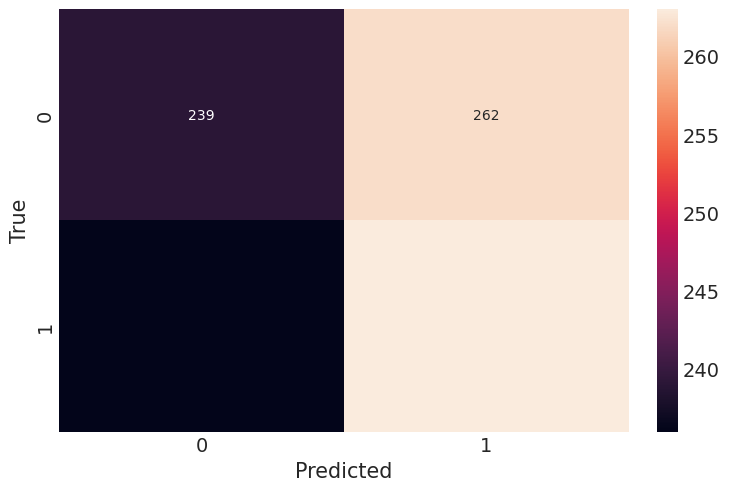

In [53]:
from sklearn.metrics import confusion_matrix
from scipy import stats

y_pred = stats.mode(ppc.predictions["y_pred"][0], axis=0)[0][0]

cm = confusion_matrix(y_test_subset, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Posterior Distribution

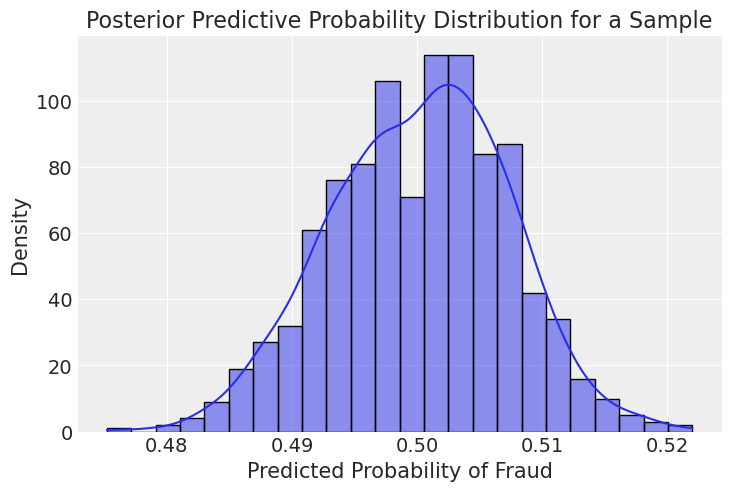

In [54]:

sns.histplot(y_pred_prob, kde=True)
plt.title('Posterior Predictive Probability Distribution for a Sample')
plt.xlabel('Predicted Probability of Fraud')
plt.ylabel('Density')
plt.show()


* **Using NUTS** (slow but more accurate)

In [15]:
with naive_bayes_model:
    trace= pm.sample(random_seed = random_seed, return_inferencedata=False, nuts_sampler='numpyro')
    naive_bayes_trace = pm.to_inference_data(trace=trace, log_likelihood=True)

Compiling...
Compilation time = 0:00:04.180796
Sampling...


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

Sampling time = 1:30:21.592014
Transforming variables...
Transformation time = 0:00:00.167127


array([[<Axes: title={'center': 'feature_means'}>,
        <Axes: title={'center': 'feature_means'}, xlabel='Rank (all chains)', ylabel='Chain'>],
       [<Axes: title={'center': 'class_prob'}>,
        <Axes: title={'center': 'class_prob'}, xlabel='Rank (all chains)', ylabel='Chain'>],
       [<Axes: title={'center': 'feature_stds'}>,
        <Axes: title={'center': 'feature_stds'}, xlabel='Rank (all chains)', ylabel='Chain'>]],
      dtype=object)

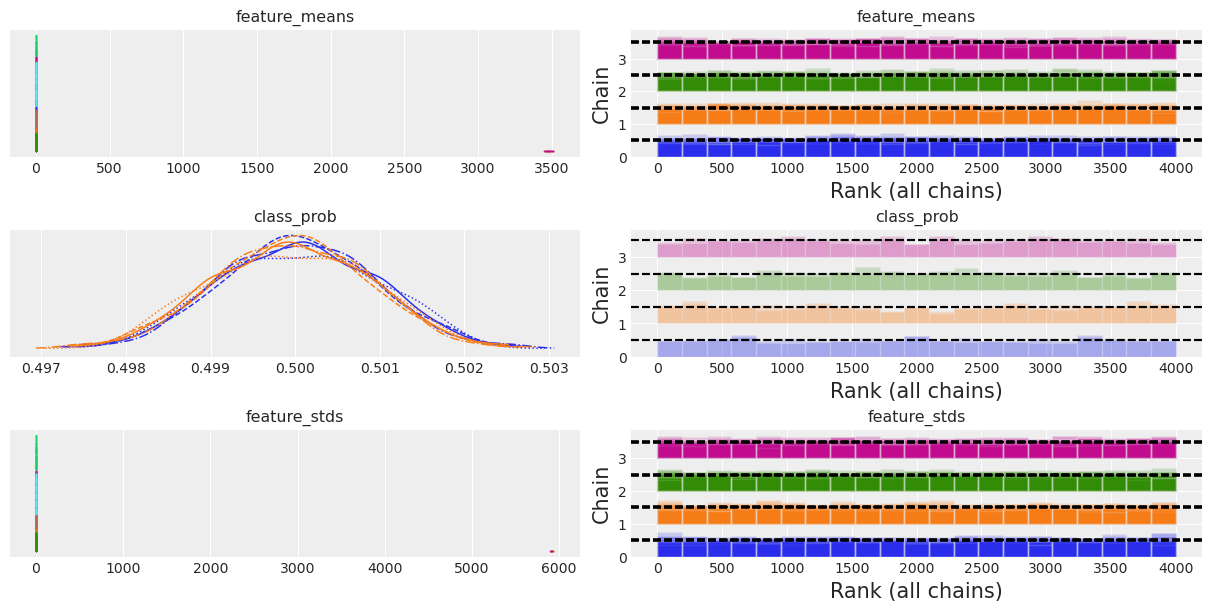

In [16]:
az.plot_trace(naive_bayes_trace, kind = 'rank_bars')

In [20]:
az.summary(naive_bayes_trace, var_names=['class_prob', 'feature_means', 'feature_stds'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
class_prob[0],0.500,0.001,0.498,0.502,0.000,0.000,11877.0,2974.0,1.0
class_prob[1],0.500,0.001,0.498,0.502,0.000,0.000,11877.0,2974.0,1.0
"feature_means[0, 0]",0.505,0.002,0.501,0.509,0.000,0.000,10659.0,2936.0,1.0
"feature_means[0, 1]",-0.493,0.002,-0.496,-0.489,0.000,0.000,8794.0,3086.0,1.0
"feature_means[0, 2]",0.682,0.002,0.678,0.685,0.000,0.000,11572.0,3046.0,1.0
...,...,...,...,...,...,...,...,...,...
"feature_stds[1, 12]",0.642,0.001,0.639,0.644,0.000,0.000,9836.0,2635.0,1.0
"feature_stds[1, 13]",1.209,0.002,1.205,1.213,0.000,0.000,11906.0,2549.0,1.0
"feature_stds[1, 14]",1.180,0.002,1.176,1.184,0.000,0.000,10001.0,3050.0,1.0
"feature_stds[1, 15]",1.367,0.003,1.362,1.371,0.000,0.000,12058.0,3250.0,1.0


d:\anaconda3\envs\pymc3env\lib\site-packages\arviz\plots\plot_utils.py:271: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (70) in plot_posterior, generating only 40 plots
  warnings.warn(


array([[<Axes: title={'center': 'feature_means\n0, 0'}>,
        <Axes: title={'center': 'feature_means\n0, 1'}>,
        <Axes: title={'center': 'feature_means\n0, 2'}>,
        <Axes: title={'center': 'feature_means\n0, 3'}>],
       [<Axes: title={'center': 'feature_means\n0, 4'}>,
        <Axes: title={'center': 'feature_means\n0, 5'}>,
        <Axes: title={'center': 'feature_means\n0, 6'}>,
        <Axes: title={'center': 'feature_means\n0, 7'}>],
       [<Axes: title={'center': 'feature_means\n0, 8'}>,
        <Axes: title={'center': 'feature_means\n0, 9'}>,
        <Axes: title={'center': 'feature_means\n0, 10'}>,
        <Axes: title={'center': 'feature_means\n0, 11'}>],
       [<Axes: title={'center': 'feature_means\n0, 12'}>,
        <Axes: title={'center': 'feature_means\n0, 13'}>,
        <Axes: title={'center': 'feature_means\n0, 14'}>,
        <Axes: title={'center': 'feature_means\n0, 15'}>],
       [<Axes: title={'center': 'feature_means\n0, 16'}>,
        <Axes: title

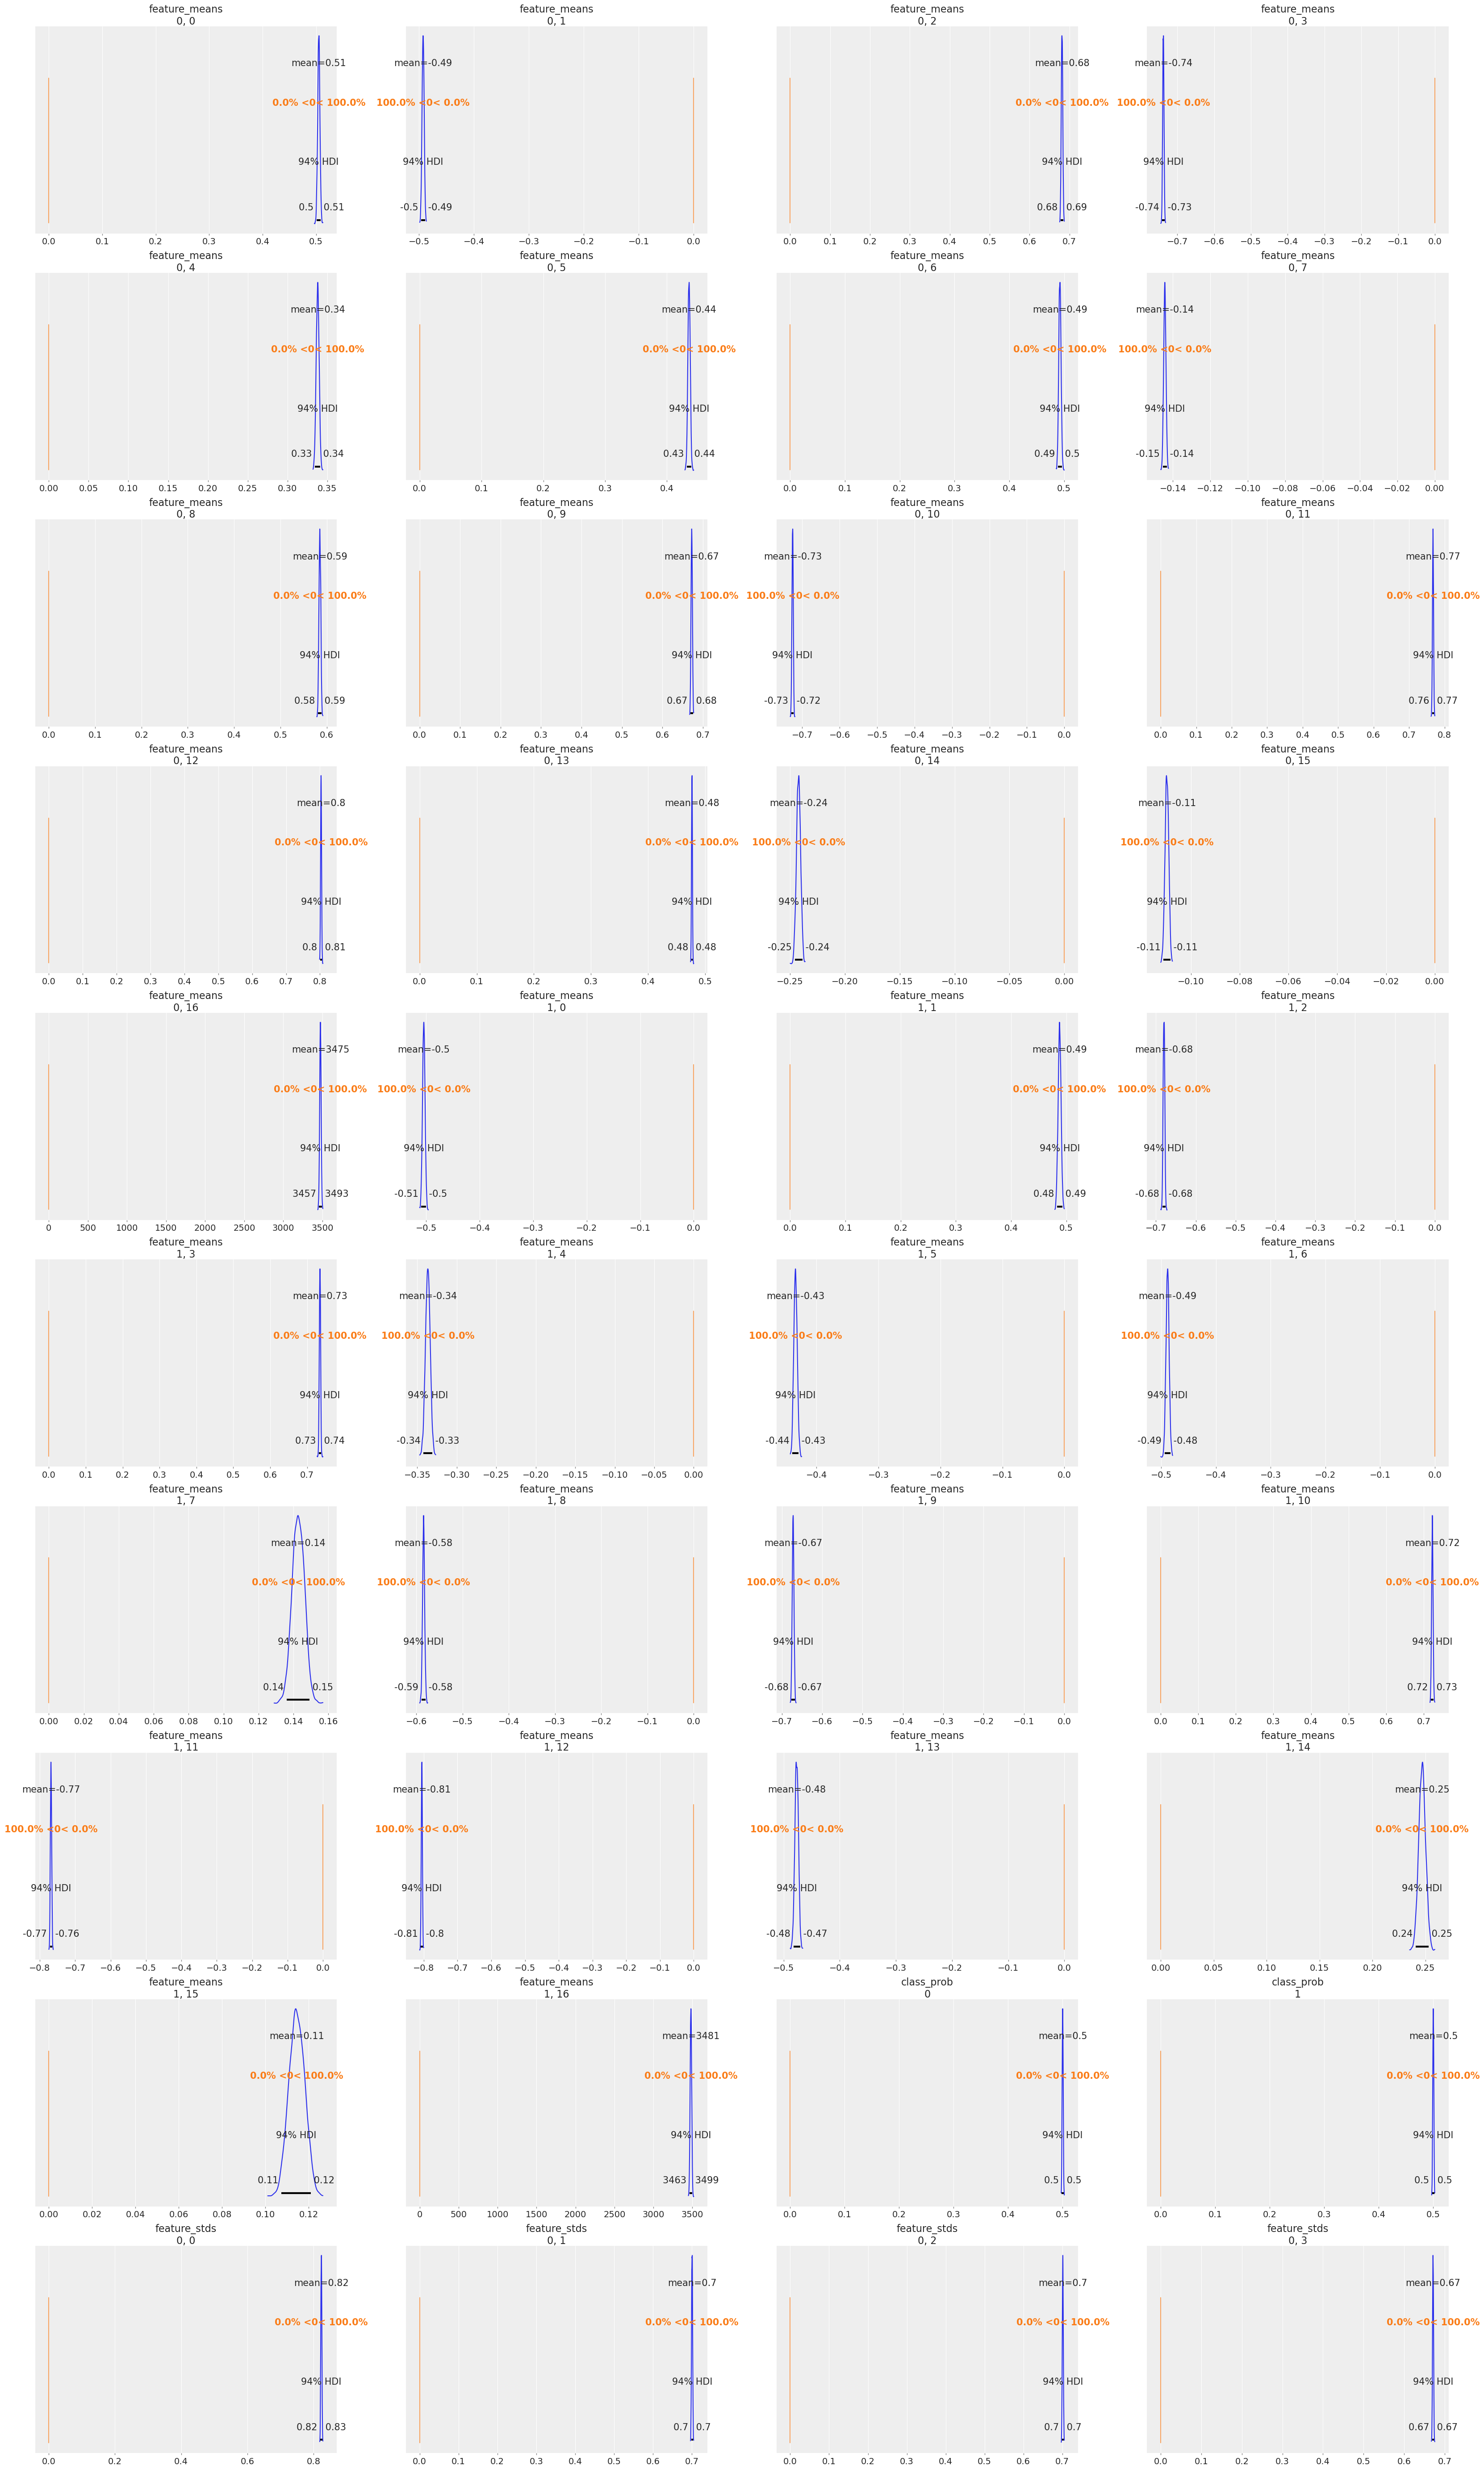

In [21]:
az.plot_posterior(naive_bayes_trace, ref_val = 0)

* **Also can use Sklearn Package** (No need to sample)

In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9224557269226035


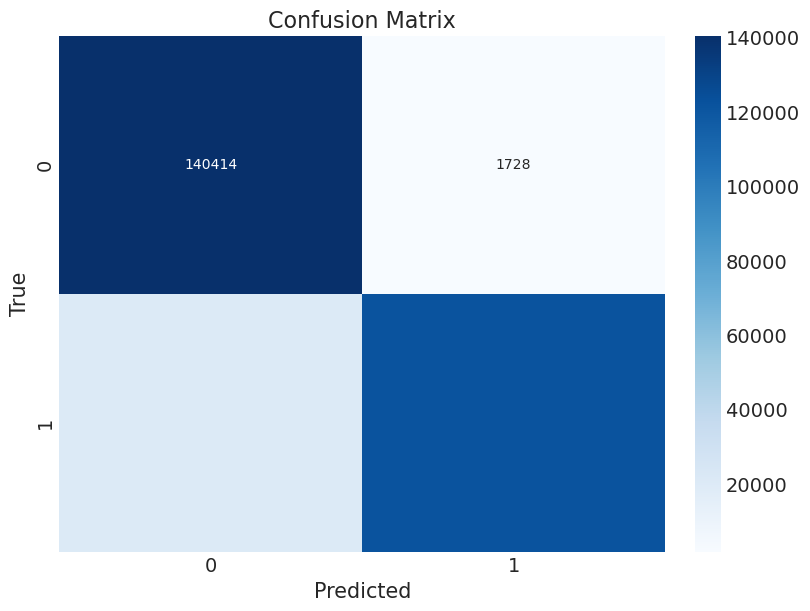

In [31]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Logistic Regression

In [ ]:
#### Logistic Regression

#### Bayesian Model Averaging

In [ ]:
# Example Code

waic1 = pm.waic(trace1, model1)
waic2 = pm.waic(trace2, model2)


model_dict = {'Model1': (model1, trace1), 'Model2': (model2, trace2)}
comp = pm.compare(model_dict)

weights = pm.compare_weights(comp)

ppc = pm.sample_posterior_predictive_w(traces=[trace1, trace2],
                                       models=[model1, model2],
                                       weights=weights,
                                       samples=1000)
